A nuvem de palavras pode ser usada para
1. Mostrar relevância de um termo na categoria
2. Um "tema" que foi relevante por um tempo na categoria
3. Em resumo termo x tema.

In [1]:
from os.path import join as ospj

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
BASEPATH = '../YoutubeData/processed/'
country_names = {
    'CA': 'Canadá',
    'US': 'Estados Unidos',
    'MX': 'México',
    'GB': 'Grã Bretanha',
    'DE': 'Alemanha',
    'FR': 'França'
}

# Funções auxiliares

In [82]:
def head(df, n=5):
    """ Função auxiliar para exibir as 'n' primeiras linhas dos dados e o seu formato """
    print('Formato dos dados:', df.shape)
    display(df.head(n))
    
def load_data(country):
    """ Função auxiliar para carregar os dados de um país, convertendo as datas no formato datetime """
    filepath = ospj(BASEPATH, f'{country}data.csv')
    return pd.read_csv(filepath, parse_dates=['trending_date', 'publish_time'])

def generate_wordcloud(df, column, unique=False):
    """ Função auxiliar para gerar e retornar uma nuvem de palavras """
    cloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=40, 
        random_state=42
    )
    
    text = ' '.join(df[column].unique() if unique else df[column])
    return cloud.generate(text)

In [97]:
data['category_name'].unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

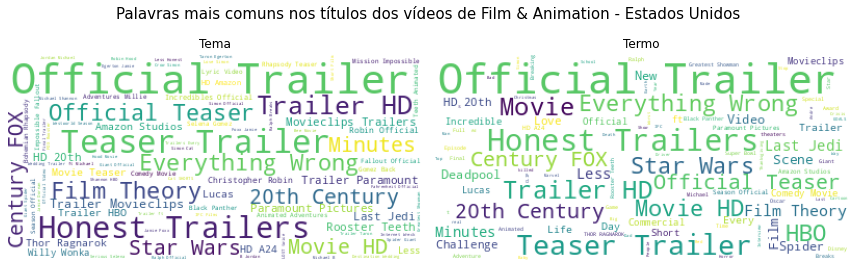

In [104]:
country = 'US'
category = 'Film & Animation'

data = load_data(country)
fig, axs = plt.subplots(ncols=2, figsize=(12,4))

for i in range(2):
    wc = generate_wordcloud(data[data['category_name'] == category], 'title', True if i == 1 else False)
    axs[i].set_title('Tema' if i == 0 else 'Termo')
    axs[i].axis(False)
    axs[i].imshow(wc)

fig.suptitle(f'Palavras mais comuns nos títulos dos vídeos de {category} - {country_names[country]}', fontsize=15)
fig.tight_layout()

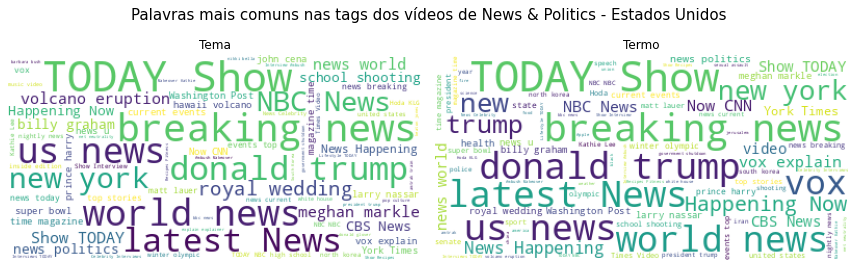

In [93]:
country = 'US'
category = 'News & Politics'

data = load_data(country)
fig, axs = plt.subplots(ncols=2, figsize=(12,4))

for i in range(2):
    wc = generate_wordcloud(data[data['category_name'] == category], 'tags', True if i == 1 else False)
    axs[i].set_title('Tema' if i == 0 else 'Termo')
    axs[i].axis(False)
    axs[i].imshow(wc)

fig.suptitle(f'Palavras mais comuns nas tags dos vídeos de {category} - {country_names[country]}', fontsize=15)
fig.tight_layout()

# 1) Gerando nuvens de palavras para cada país
## 1.1) Título dos vídeos 

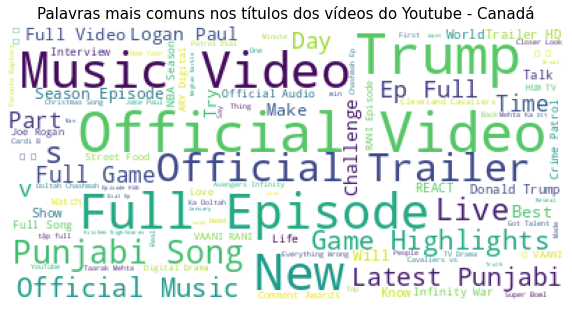

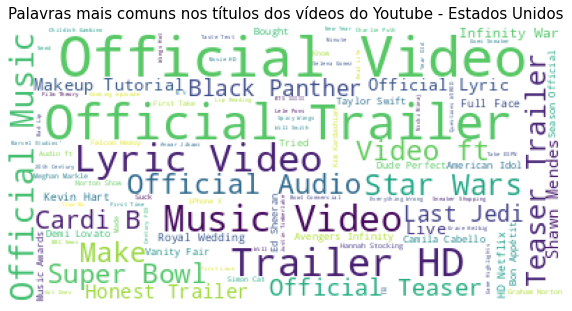

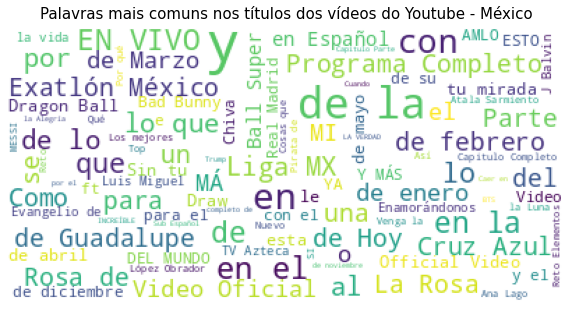

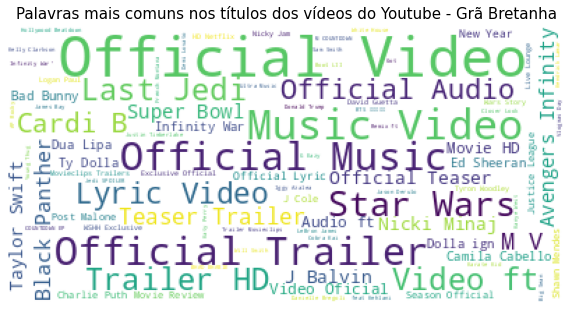

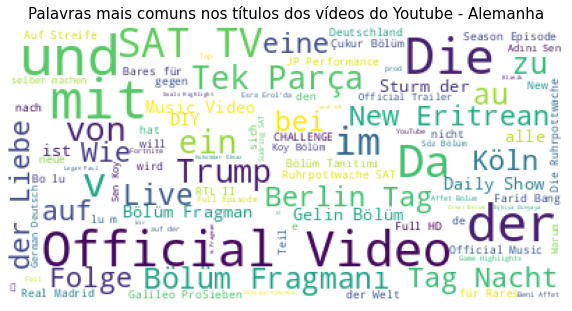

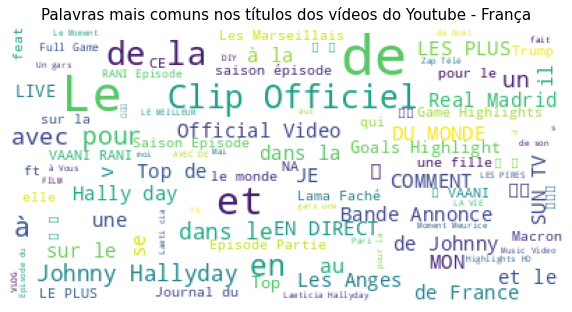

In [29]:
for country in country_names:
    wc = generate_wordcloud(load_data(country), 'title')
    plt.figure(figsize=(10,8))
    plt.axis(False)
    
    plt.title("Palavras mais comuns nos títulos dos vídeos do Youtube - " + country_names[country], fontsize=15)
    plt.imshow(wc)
    plt.show()

## 1.2) Tags dos vídeos 

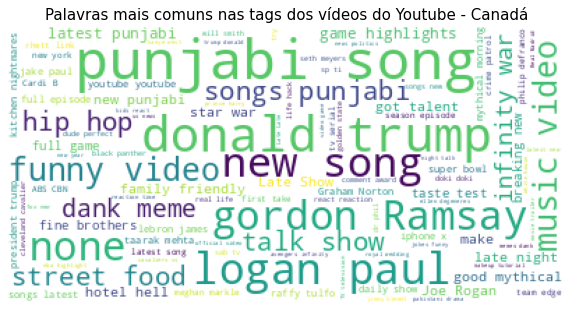

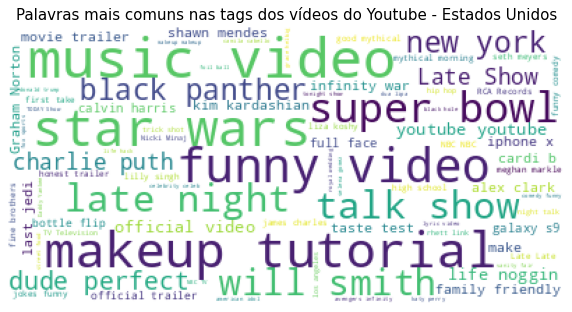

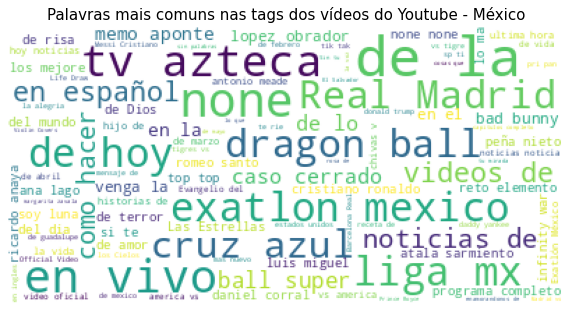

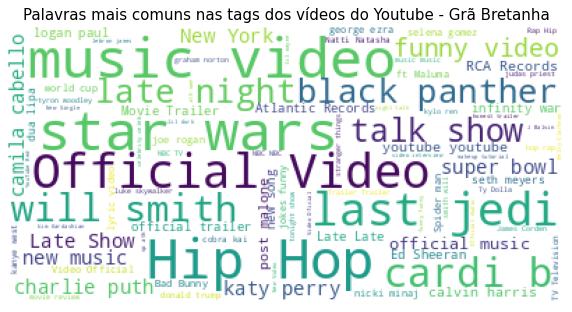

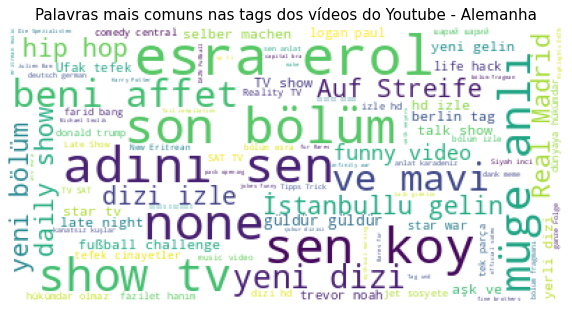

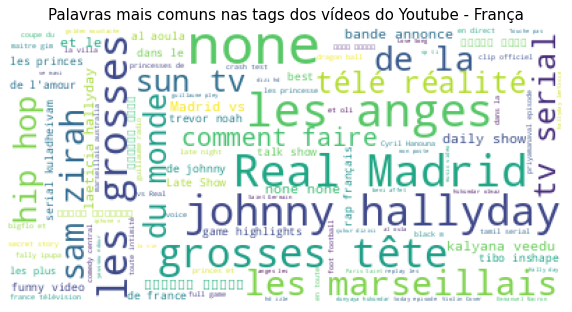

In [30]:
for country in country_names:
    wc = generate_wordcloud(load_data(country), 'tags')
    plt.figure(figsize=(10,8))
    plt.axis(False)
    
    plt.title("Palavras mais comuns nas tags dos vídeos do Youtube - " + country_names[country], fontsize=15)
    plt.imshow(wc)
    plt.show()

# 2) Gerando nuvens de palavras para cada categoria (par a par)
## 2.1) Título dos vídeos 

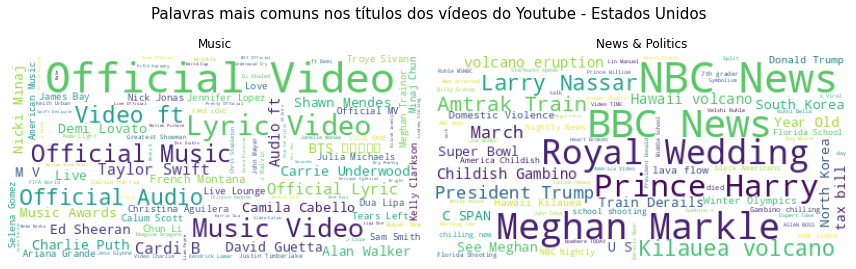

In [52]:
country = 'US'
categories = ['Music', 'News & Politics']

data = load_data(country)
fig, axs = plt.subplots(ncols=2, figsize=(12,4))

for i in range(2):
    wc = generate_wordcloud(data[data['category_name'] == categories[i]], 'title')
    axs[i].set_title(categories[i])
    axs[i].axis(False)
    axs[i].imshow(wc)

fig.suptitle(f'Palavras mais comuns nos títulos dos vídeos do Youtube - {country_names[country]}', fontsize=15)
fig.tight_layout()

In [70]:
filter_ = list(map(lambda x: 'Gambino' in x, data['title']))
data[filter_].groupby('title')['category_name'].unique()

title
An Expert's Take On The Symbolism In Childish Gambino’s Viral ‘This Is America’ Video | TIME    [News & Politics]
Breaking down 'This Is America,' Childish Gambino's chilling new video                          [News & Politics]
Childish Gambino - This Is America (Official Video)                                                       [Music]
Childish Gambino Gives SOULFUL Terrified Performance At 2018 Grammys                              [Entertainment]
Childish Gambino: This Is America (Live) - SNL                                                    [Entertainment]
What New Yorkers Think Childish Gambino's “This Is America” Means | Genius News                           [Music]
Name: category_name, dtype: object

In [94]:
news = data[data['category_name'] == 'News & Politics']

filter_ = list(map(lambda x: 'Gambino' in x, news['title']))
len(news[filter_])

39